# Context
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

### Attribute Information
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [1]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Our Data is in csv format, therefore we will use the pandas read csv method to load the data.

In [2]:
#importing our stroke dataset
dataset = pd.read_csv('data/healthcare-dataset-stroke-data.csv')

# Exploratory Data Analysis 
EDA is used to get a better understanding of data. Looking at the data, questions may arise, such as, how many rows and columns are there? Is the data numeric? What are the names of the features (columns)? Are there any missing values, text, and numeric symbols inappropriate to the data?

We need to understand the data, Lets look at the first few rows of the data to check if it loaded properly and its looks the way we expect it.

In [3]:
#Lets Look at the columns and first 5 rows
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
#Lets Check the columns 
dataset.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [5]:
#Loook at the shape of the data 
print('Number of features: %s' %dataset.shape[1])
print('Number of records: %s' %dataset.shape[0])

Number of features: 12
Number of records: 5110


In [6]:
# gathering the information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


We can see that bmi values are not correspending with the rest, so lets check for missing values.

Next we check the datatypes and the state of entry availability for every row.

In [7]:
dataset.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

201 records are missing bmi values, we need to deal with this before we proceed.
1. Deleting Rows or columns with missing entries. this can be done if the column is missing 70% or more entries. This decreases the dataset and my introduce a bias or skewness of the data which in turn will affect the perfomance of the model.

2. Replacing With Mean/Median/Mode - This strategy is the common in the data science community, it is applied on a feature which has numeric data like the age of a person or the ticket fare. We can calculate the mean, median or mode of the feature and replace it with the missing values. and we will use this method.


In [8]:
# Replace the bmi null values with mean avaerage bmi
dataset = dataset.replace(to_replace=np.nan,value=dataset.mean())

In [9]:
# checking null values again
dataset.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [10]:
#Drop the column id, it has no meaning.
dataset = dataset[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status','stroke']]

We have now replaced the null values on bmi with average bmi of the dataset

In [11]:
correlation=dataset.corr()

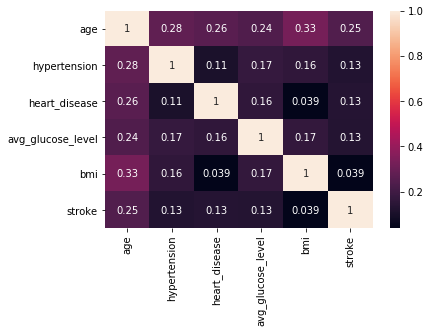

In [12]:
sns.heatmap(correlation,annot=True)

In [13]:
#Lets check the unique values in every column
dataset.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   419
smoking_status          4
stroke                  2
dtype: int64

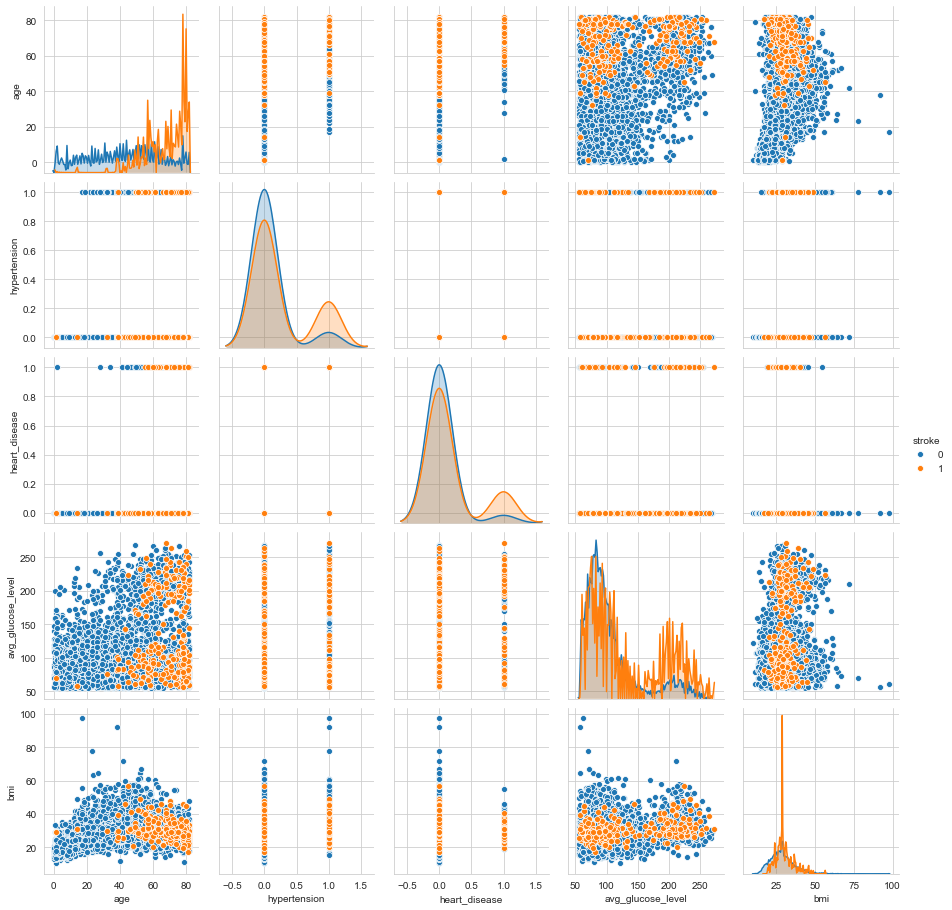

In [14]:
#Use a pairplot to find the relationship of the features to our target variable.
sns.set_style('whitegrid')
sns.pairplot(dataset, hue='stroke', diag_kws={'bw': 0.2})
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
label_encoder=LabelEncoder()

In [17]:
dataset = dataset.apply(label_encoder.fit_transform)

In [18]:
dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,88,0,1,1,2,1,3850,240,1,1
1,0,82,0,0,1,3,0,3588,162,2,1
2,1,101,0,1,1,2,0,2483,199,2,1
3,0,70,0,0,1,2,1,3385,218,3,1
4,0,100,1,0,1,3,0,3394,113,2,1


In [19]:
from ipywidgets import interact

In [20]:
#First let's visualize our data some more
def plot_feature(feature):
    plt.plot(dataset[feature], dataset.stroke, '.')
    plt.xlabel(feature)
    plt.ylabel('stroke')

menu = dataset[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']]

interact(plot_feature, feature=menu);

interactive(children=(Dropdown(description='feature', options=('gender', 'age', 'hypertension', 'heart_disease…

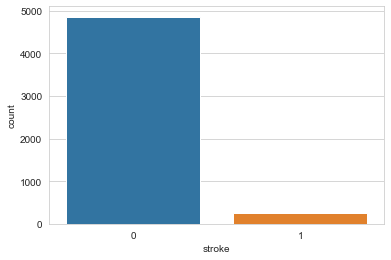

In [21]:
sns.countplot(dataset['stroke'])

# Model Development

In [22]:
#Lets split the data into training and testing the dataset
#Import the method used to split the dataset
from sklearn.model_selection import train_test_split

In [23]:
y = dataset['stroke']
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [24]:
#dropping the output label
X= dataset.drop('stroke', axis=1)
X.shape

(5110, 10)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3, random_state = 1000)

In [26]:
y_train.value_counts()

0    3408
1     169
Name: stroke, dtype: int64

#### # Feature selection 
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

In [70]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [71]:
modelf = ExtraTreesClassifier(random_state = 15, criterion ='entropy', max_depth = 10)
modelf.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='entropy', max_depth=10, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=15, verbose=0,
                     warm_start=False)

In [72]:
#Lets print out the feature importance rating for each feature.

fi_col = []
fi = []
for i, column in enumerate(X):
    print('The feature importance for {} is : {}'.format(column, modelf.feature_importances_[i]))
    
    fi_col.append(column)
    fi.append(modelf.feature_importances_[i])

The feature importance for gender is : 0.04151362725154346
The feature importance for age is : 0.36114734829414136
The feature importance for hypertension is : 0.07217606718186503
The feature importance for heart_disease is : 0.06279081709993437
The feature importance for ever_married is : 0.07780288258973647
The feature importance for work_type is : 0.06469820516430415
The feature importance for Residence_type is : 0.03809580107403044
The feature importance for avg_glucose_level is : 0.1224960008507996
The feature importance for bmi is : 0.08978571011538838
The feature importance for smoking_status is : 0.06949354037825674


In [73]:
#Put these features into a dataframe
fi_df = zip(fi_col, fi)
fi_df = pd.DataFrame(fi_df, columns =['Feature', 'Feature Importance'])
fi_df

,Feature,Feature Importance
0,gender,0.041514
1,age,0.361147
2,hypertension,0.072176
3,heart_disease,0.062791
4,ever_married,0.077803
5,work_type,0.064698
6,Residence_type,0.038096
7,avg_glucose_level,0.122496
8,bmi,0.089786
9,smoking_status,0.069494


In [74]:
fi_df = fi_df.sort_values('Feature Importance', ascending = False).reset_index()
fi_df

,index,Feature,Feature Importance
0,1,age,0.361147
1,7,avg_glucose_level,0.122496
2,8,bmi,0.089786
3,4,ever_married,0.077803
4,2,hypertension,0.072176
5,9,smoking_status,0.069494
6,5,work_type,0.064698
7,3,heart_disease,0.062791
8,0,gender,0.041514
9,6,Residence_type,0.038096


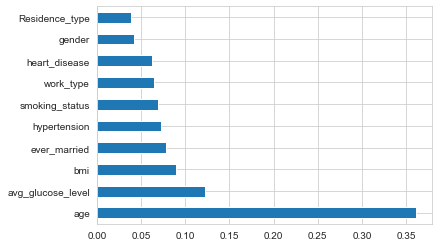

In [76]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(modelf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

    From the graph below, we can see that age is the most important feature. we can drop residence type and gender

In [78]:
X_train = X_train[['hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']]

X_test = X_test[['hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']]

In [79]:
X_train.columns

Index(['hypertension', 'heart_disease', 'ever_married', 'work_type',
       'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status'],
      dtype='object')

In [80]:
X_test.columns

Index(['hypertension', 'heart_disease', 'ever_married', 'work_type',
       'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status'],
      dtype='object')

<img src="1_syO1R7DTwWrNDyQoWkm0dQ.png">

To selected the model we are guided by our data and the target variable. We use the following guideline shown above.
1. We have more than 50 samples, so we can proceed to declare this a problem suitable for machine learnng.
2. We are predicting a categorical target variable and a binary outcomes
3. We have labeled data, so this a supervised learning problem.
3. We have less than 100k samples so lets start with linear svc(LINEAR SUPPORT CLASSIFIER)

### WE tried different models and what gave us the best is the desion tree.

In [81]:
#Train a decision tree classifier
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()   #Instantiate an object out of our class
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Confusion Matrix (Digits Dataset) A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known. In this section, I am just showing two python packages (Seaborn and Matplotlib) for making confusion matrices more understandable and visually appealing.

In [82]:
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.metrics import accuracy_score

In [83]:
#Plot the confusion matrix for the testing data
y_predict_test = decision_tree.predict(X_test)

y_predict_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [84]:
cm = confusion_matrix(y_test, y_predict_test)

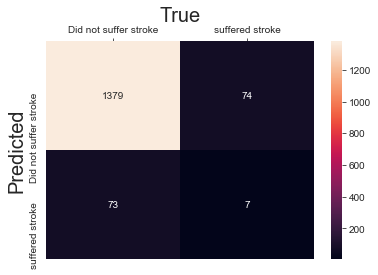

In [85]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('True', fontsize=20)
ax.xaxis.set_label_position('top') 
ax.xaxis.set_ticklabels(['Did not suffer stroke','suffered stroke'], fontsize = 10)
ax.xaxis.tick_top()

ax.set_ylabel('Predicted', fontsize=20)
ax.yaxis.set_ticklabels(['Did not suffer stroke', 'suffered stroke'], fontsize = 10)
plt.show()

In [86]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1453
           1       0.09      0.09      0.09        80

    accuracy                           0.90      1533
   macro avg       0.52      0.52      0.52      1533
weighted avg       0.90      0.90      0.90      1533



In [87]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_predict_test))

Accuracy: 0.9041095890410958


We have a classification rate of 90%, considered as very good accuracy.

If the model was not performing correctly, we do some hyperparameter tuning.

Further actions could be taken such as observation of what happens if the data is normalized or standardized.
If tuning is not yielding results, the next this do is to look at other classification models such a Support Vector Machine, Naive Bayes, random forest or ensemble methods.

In [90]:
#Save the model
pickle.dump(decision_tree, open('model.pkl', 'wb'))